/home/oem/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


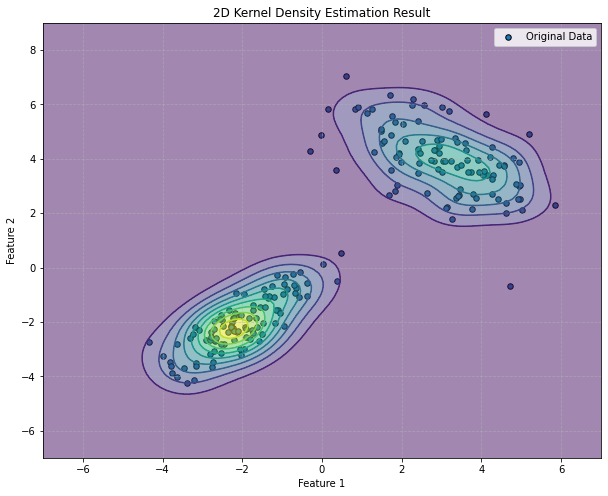

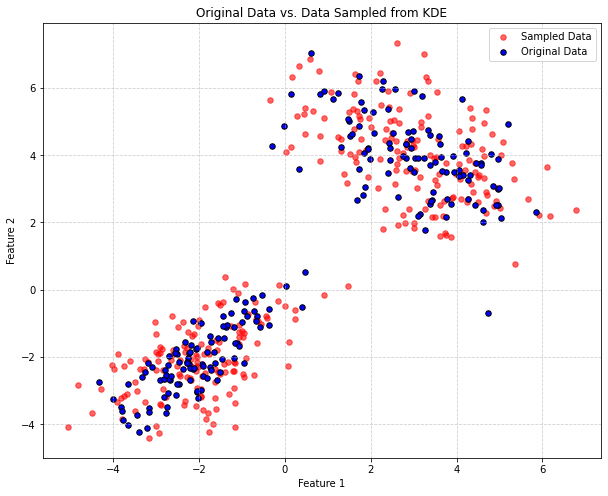

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# -----------------------------------------------------
# 1. KDE 효과를 잘 보여줄 수 있는 2차원 데이터셋 생성
# -----------------------------------------------------
# 두 개의 다른 정규분포에서 데이터를 생성하여 합칩니다.
# 이는 데이터가 두 개의 "덩어리"로 군집을 이루는 형태를 만듭니다.

# 첫 번째 데이터 군집 생성
mean1 = [-2, -2]
cov1 = [[1, 0.8], [0.8, 1]]  # 타원 형태
X1 = np.random.multivariate_normal(mean1, cov1, 100)

# 두 번째 데이터 군집 생성
mean2 = [3, 4]
cov2 = [[1.5, -0.7], [-0.7, 1.5]] # 다른 방향의 타원 형태
X2 = np.random.multivariate_normal(mean2, cov2, 100)

# 두 군집을 하나의 데이터셋으로 통합
X_train = np.vstack([X1, X2])

# -----------------------------------------------------
# 2. Kernel Density Estimation 수행
# -----------------------------------------------------
# KDE 모델을 생성하고 학습시킵니다.
# bandwidth: 커널의 "폭"을 결정하는 중요한 파라미터입니다.
#            값이 클수록 더 부드러운(뭉툭한) 분포가, 작을수록 더 뾰족한 분포가 추정됩니다.
kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(X_train)

# -----------------------------------------------------
# 3. KDE 결과 시각화
# -----------------------------------------------------
# 밀도 추정 결과를 등고선(contour) 플롯으로 그립니다.
x_min, x_max = -7, 7
y_min, y_max = -7, 9

# 시각화를 위한 그리드 생성
xx, yy = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([xx.ravel(), yy.ravel()]).T

# 그리드의 각 위치에서 밀도의 로그 값(log-density)을 계산
log_density = kde.score_samples(positions)

# 로그 값을 실제 밀도 값으로 변환 (지수 함수 사용)
Z = np.exp(log_density)
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize=(10, 8))
# 원본 데이터를 산점도로 표시
plt.scatter(X_train[:, 0], X_train[:, 1], s=30, edgecolor='black', label='Original Data')
# KDE로 추정한 밀도를 등고선으로 표시
plt.contour(xx, yy, Z, levels=10, cmap='viridis')
# 색상으로 채워진 등고선
plt.contourf(xx, yy, Z, levels=10, cmap='viridis', alpha=0.5)
plt.title('2D Kernel Density Estimation Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# -----------------------------------------------------
# 4. 학습된 KDE 모델로부터 새로운 데이터 샘플링 및 시각화
# -----------------------------------------------------
# kde.sample() 메서드를 사용하여 새로운 데이터 300개를 생성합니다.
# 이 데이터는 KDE가 학습한 분포를 따르게 됩니다.
new_samples = kde.sample(n_samples=300, random_state=42)

# 샘플링 결과 시각화
plt.figure(figsize=(10, 8))
# 새로 샘플링된 데이터를 연한 색으로 먼저 그립니다.
plt.scatter(new_samples[:, 0], new_samples[:, 1], s=30, c='red', alpha=0.6, label='Sampled Data')
# 원본 데이터를 진한 색으로 겹쳐서 그립니다.
plt.scatter(X_train[:, 0], X_train[:, 1], s=30, edgecolor='black', facecolor='blue', label='Original Data')

plt.title('Original Data vs. Data Sampled from KDE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

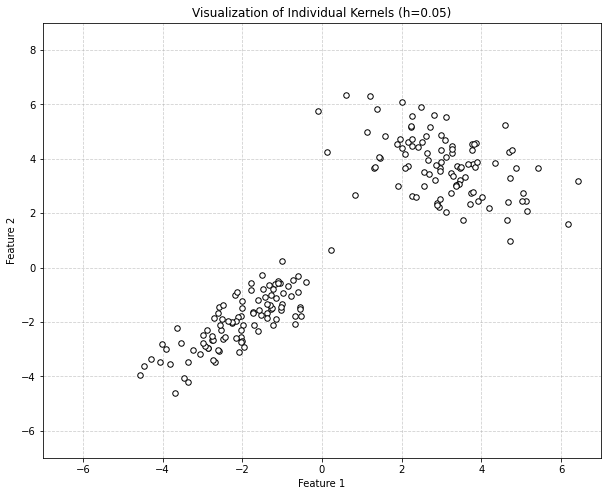

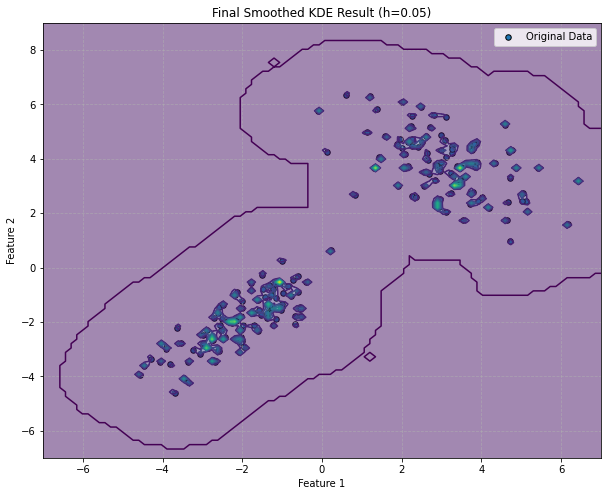

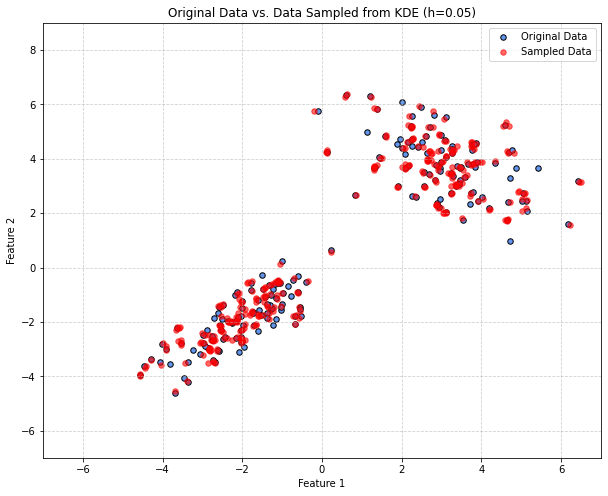

------------------------------------------------------------


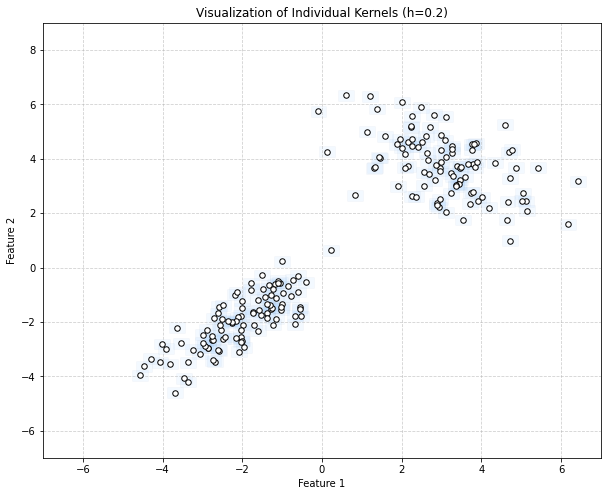

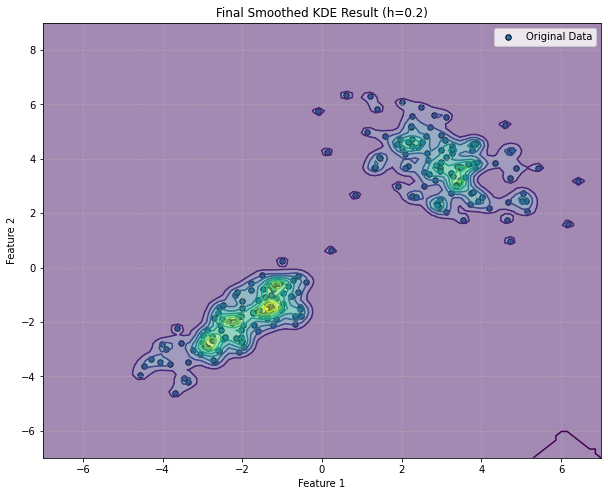

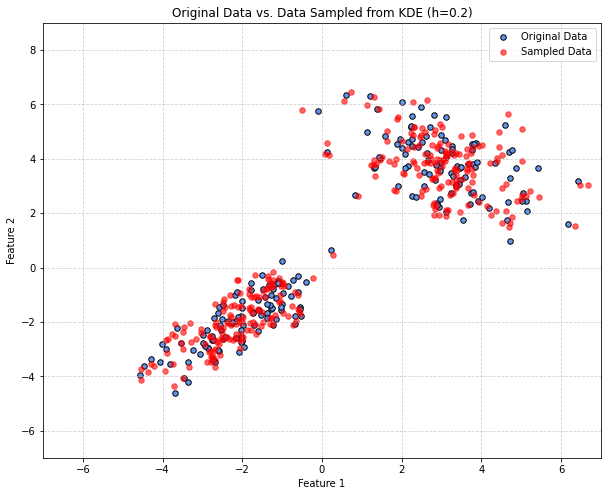

------------------------------------------------------------


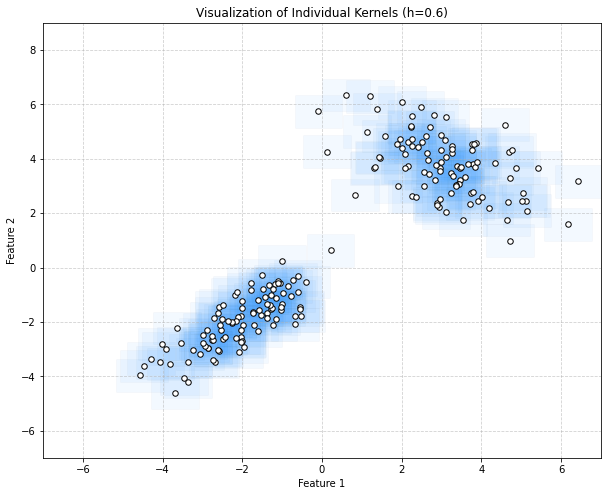

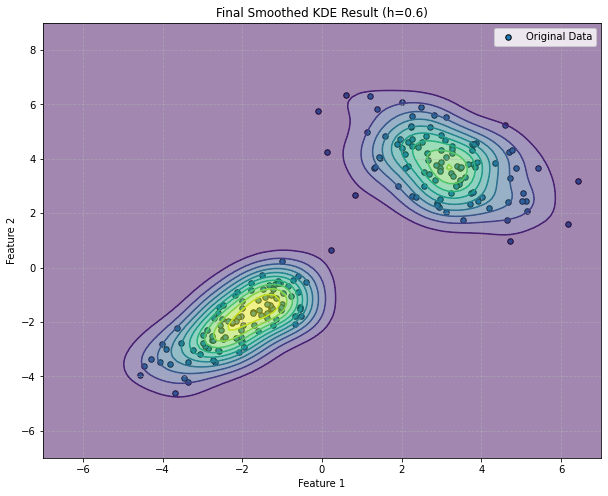

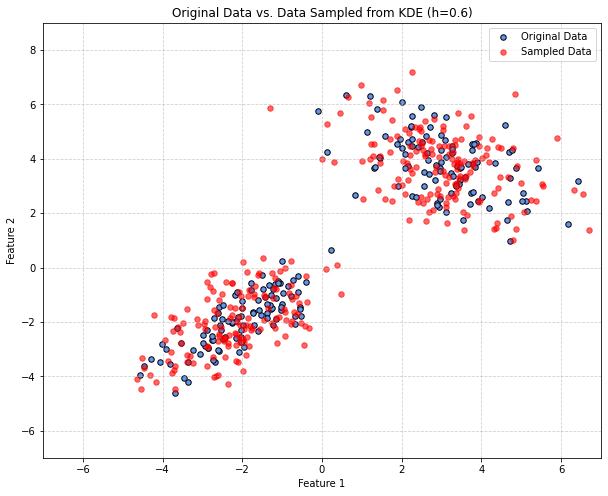

------------------------------------------------------------


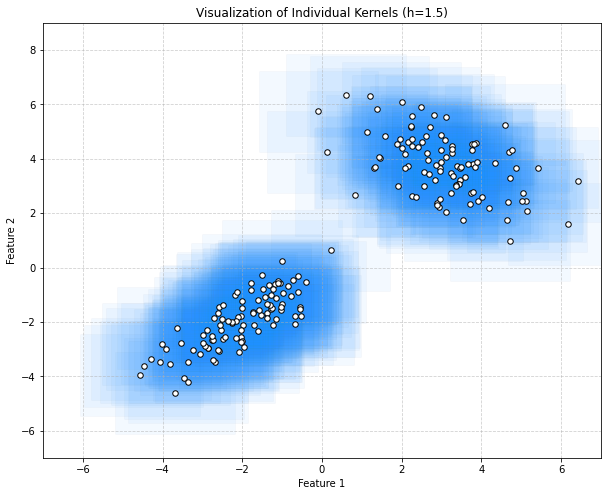

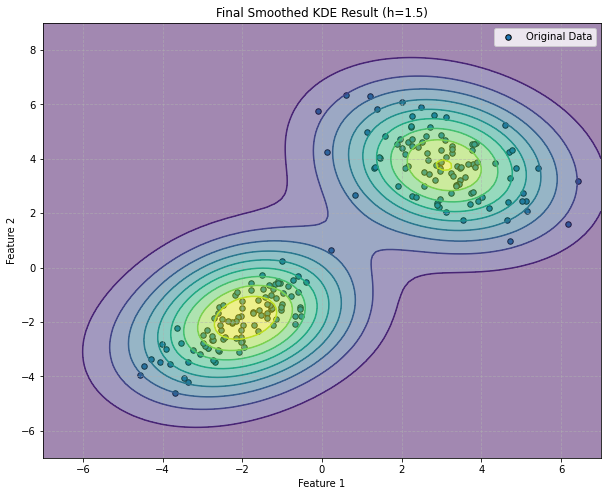

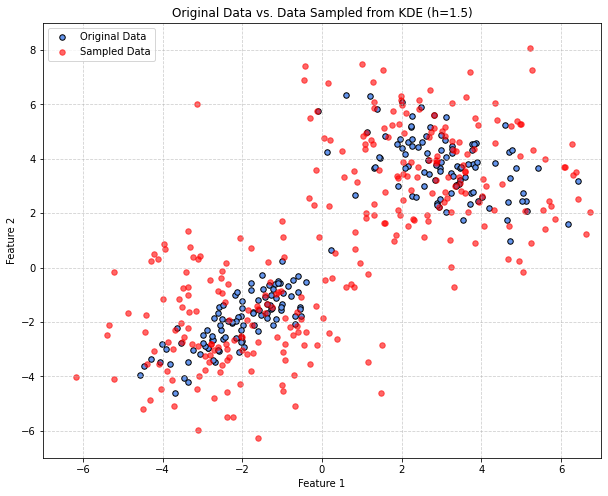

------------------------------------------------------------


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from matplotlib.patches import Rectangle # 사각형을 그리기 위해 import

# 테스트할 h 값들의 리스트
h_list = [0.05, 0.2, 0.6, 1.5]

for h in h_list :
    # -----------------------------------------------------
    # 1. 이전과 동일한 2차원 데이터셋 생성
    # -----------------------------------------------------
    # 재현성을 위해 시드 고정
    np.random.seed(0)
    # 첫 번째 데이터 군집 생성
    mean1 = [-2, -2]
    cov1 = [[1, 0.8], [0.8, 1]]
    X1 = np.random.multivariate_normal(mean1, cov1, 100)

    # 두 번째 데이터 군집 생성
    mean2 = [3, 4]
    cov2 = [[1.5, -0.7], [-0.7, 1.5]]
    X2 = np.random.multivariate_normal(mean2, cov2, 100)

    # 두 군집을 하나의 데이터셋으로 통합
    X_train = np.vstack([X1, X2])

    # -----------------------------------------------------
    # 2. 각 데이터에 할당된 커널(사각형) 시각화
    # -----------------------------------------------------
    fig, ax = plt.subplots(figsize=(10, 8))
    for point in X_train:
        rect = Rectangle(
            xy=(point[0] - h, point[1] - h),  # 사각형의 좌측 하단 꼭짓점 좌표
            width=2 * h,
            height=2 * h,
            facecolor='dodgerblue',
            alpha=0.05,  # 낮은 투명도
            edgecolor='gray',
            linewidth=0.5
        )
        ax.add_patch(rect)
    ax.scatter(X_train[:, 0], X_train[:, 1], s=30, edgecolor='black', facecolor='white', zorder=3)
    ax.set_title(f'Visualization of Individual Kernels (h={h})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlim(-7, 7)
    ax.set_ylim(-7, 9)
    plt.show()

    # -----------------------------------------------------
    # 3. (비교용) 최종 KDE 결과 재시각화
    # -----------------------------------------------------
    kde = KernelDensity(kernel='gaussian', bandwidth=h)
    kde.fit(X_train)
    x_min, x_max = -7, 7
    y_min, y_max = -7, 9
    xx, yy = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()]).T
    log_density = kde.score_samples(positions)
    Z = np.exp(log_density).reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.scatter(X_train[:, 0], X_train[:, 1], s=30, edgecolor='black', label='Original Data')
    plt.contourf(xx, yy, Z, levels=10, cmap='viridis', alpha=0.5)
    plt.contour(xx, yy, Z, levels=10, cmap='viridis')
    plt.title(f'Final Smoothed KDE Result (h={h})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    
    # -------------------------------------------------------------------
    # 4. 샘플링된 데이터를 시각화하는 코드 (요청하신 부분)
    # -------------------------------------------------------------------
    # 바로 위에서 h값으로 학습된 kde 모델로부터 새로운 데이터 300개를 샘플링합니다.
    n_new_samples = 300
    new_samples = kde.sample(n_samples=n_new_samples, random_state=42)

    # 샘플링 결과 시각화
    plt.figure(figsize=(10, 8))
    # 원본 데이터를 파란색으로 표시합니다.
    plt.scatter(X_train[:, 0], X_train[:, 1], s=30, edgecolor='black', facecolor='cornflowerblue', label='Original Data')
    # 새로 샘플링된 데이터를 빨간색 점으로 표시합니다.
    plt.scatter(new_samples[:, 0], new_samples[:, 1], s=30, c='red', alpha=0.6, label='Sampled Data')

    plt.title(f'Original Data vs. Data Sampled from KDE (h={h})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    # 비교를 위해 모든 그래프의 축 범위를 고정합니다.
    plt.xlim(-7, 7)
    plt.ylim(-7, 9)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    print("-" * 60) # 각 h 루프가 끝날 때마다 구분선 출력

In [11]:
import numpy as np

# -----------------------------------------------------
# 1. 이전과 동일한 2차원 데이터셋 생성 (생략 가능)
# -----------------------------------------------------
mean1 = [-2, -2]
cov1 = [[1, 0.8], [0.8, 1]]
X1 = np.random.multivariate_normal(mean1, cov1, 100)
mean2 = [3, 4]
cov2 = [[1.5, -0.7], [-0.7, 1.5]]
X2 = np.random.multivariate_normal(mean2, cov2, 100)
X_train = np.vstack([X1, X2])

# -----------------------------------------------------
# 2. KDE 파라미터(h) 설정
# -----------------------------------------------------
# 시각화 및 계산에 사용할 커널의 폭(bandwidth)
h = 0.6
# 데이터의 차원 (2차원)
d = X_train.shape[1] 

# -----------------------------------------------------
# 3. 각 커널의 공분산 행렬 계산 및 출력 (요청하신 부분)
# -----------------------------------------------------
# 단위 행렬 생성 (2x2)
identity_matrix = np.eye(d)

# 각 커널에 동일하게 적용되는 공분산 행렬 계산
# 공식: Covariance = h^2 * I
kernel_covariance = h**2 * identity_matrix

print(f"사용한 Bandwidth (h): {h}")
print("-" * 30)
print("각 커널의 공분산 행렬 (Σ = h² * I):")
print(kernel_covariance)

사용한 Bandwidth (h): 0.6
------------------------------
각 커널의 공분산 행렬 (Σ = h² * I):
[[0.36 0.  ]
 [0.   0.36]]


In [4]:
# scikit-learn을 이용한 예시 코드
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
import numpy as np

# h 후보군 설정
params = {'bandwidth': np.logspace(-1, 1, 20)} # 0.1 ~ 10 사이 20개 후보

# GridSearchCV 객체 생성 (cv=5는 5-fold cross-validation)
grid = GridSearchCV(KernelDensity(kernel='gaussian'), params, cv=5)

# 데이터(X_train)에 대해 그리드 서치 실행
grid.fit(X_train)

print(f"최적의 Bandwidth (h): {grid.best_estimator_.bandwidth}")

최적의 Bandwidth (h): 0.5455594781168519
